In [11]:
import wbdata
import pandas as pd
import pandas_profiling
import datetime
import quandl
%config IPCompleter.greedy=True
import pandas_datareader



# Monthly data - currency crisis
    

In [7]:

### Inspecting world bank  Apis

wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [80]:
wbdata.search_indicators("interest rate")

FB.FCP.INST.CB.PD.ER 	459_Are commercial banks required to disclose effective interest rate at the shopping and/or pre-contractual stage?_#VHAA_00
FB.INC.INST.CB.LN.AL 	168_For commercial banks, is all lending subject to interest rate caps or pricing limits?
FB.INC.INST.CB.LN.NL 	169_For commercial banks, are there no interest rate caps or pricing limits?
FB.INC.INST.CB.LN.SL 	170_For commercial banks, are there some interest rate caps or pricing limits that apply to certain products or segments?
FB.INC.INST.CB.LN.WL 	171_For commercial banks, is all, some, or no lending subject to interest rate caps or pricing limits?_#VGIA_00
FB.INC.INST.FC.LN.AL 	176_For financial cooperatives, is all lending subject to interest rate caps or pricing limits?
FB.INC.INST.FC.LN.NL 	177_For financial cooperatives, are there no interest rate caps or pricing limits?
FB.INC.INST.FC.LN.SL 	178_For financial cooperatives, are there some interest rate caps or pricing limits that apply to certain products or s

In [97]:
### fecthing country names from IMF database to get all ISO codes
countrycodes = pd.read_csv('coucodes.csv', delimiter = ';', encoding = "ISO-8859-1")
countrycodes.head()



,Country Name WB,IMF Name,TradingEconomics,ISO Code,Default Database Naming,IMF Code,ISO2 Code,IDA Country,IDA Region,Coups Database,EM Flag,EM / DM Flag,Region (IMF),WB File,OECD High Income
0,Afghanistan,Afghanistan,NaN,AFG,Afghanistan,512.0,AF,IDA,South Asia,AFG,EM,EM,APAC,Afghanistan,No
1,Albania,Albania,Albania,ALB,Albania,914.0,AL,NaN,NaN,ALB,EM,EM,Western Europe,Albania,No
2,Algeria,Algeria,NaN,DZA,Algeria,612.0,DZ,NaN,NaN,ALG,EM,EM,North Africa,Algeria,No
3,Angola,Angola,Angola,AGO,Angola,614.0,AO,NaN,NaN,ANG,EM,EM,Sub-Saharan Africa,Angola,No
4,Argentina,Argentina,Argentina,ARG,Argentina,213.0,AR,NaN,NaN,ARG,EM,EM,Latin America,Argentina,No


In [9]:
wbdata.get_indicator(source=15)


CORENS       	Core CPI,not seas.adj,,,
CORESA       	Core CPI,seas.adj,,,
CPTOTNSXN    	CPI Price, nominal
CPTOTSAXMZGY 	CPI Price, % y-o-y, median weighted, seas. adj.
CPTOTSAXN    	CPI Price, nominal, seas. adj.
CPTOTSAXNZGY 	CPI Price, % y-o-y, nominal, seas. adj.
DMGSRMRCHNSCD	Imports Merchandise, Customs, current US$, millions
DMGSRMRCHNSKD	Imports Merchandise, Customs, constant US$, millions
DMGSRMRCHNSXD	Imports Merchandise, Customs, Price, US$
DMGSRMRCHSACD	Imports Merchandise, Customs, current US$, millions, seas. adj.
DMGSRMRCHSAKD	Imports Merchandise, Customs, constant US$, millions, seas. adj.
DMGSRMRCHSAXD	Imports Merchandise, Customs, Price, US$, seas. adj.
DPANUSLCU    	Official exchange rate, LCU per USD, period average
DPANUSSPB    	Exchange rate, new LCU per USD extended backward, period average
DPANUSSPF    	Exchange rate, old LCU per USD extended forward, period average
DSTKMKTXD    	Stock Markets, US$
DSTKMKTXN    	Stock Markets, LCU
DXGSRMRCHNSCD	Exports Merchandi

In [15]:
#downloading data from worldbank

from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 2010, end = 2020, freq = "M")
worldbank_data2 = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1999, end = 2009, freq = "M")
worldbank_data3 = pandas_datareader.wb.download(indicator = ["NEER", "REER", "TOT", "TOTRESV","UNEMPSA_", "RETSALESSA",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1990, end = 1998, freq = "M")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])



In [69]:
#describe data



In [17]:
GDP_Q = pandas_datareader.wb.download(indicator = ["NYGDPMKTPSACD"], country = countrycodes["ISO Code"], start = 2010, end = 2020, freq = "Q")
GDP2_Q = pandas_datareader.wb.download(indicator = ["NYGDPMKTPSACD"], country = countrycodes["ISO Code"], start = 1999, end = 2009, freq = "Q")
GDP3_Q = pandas_datareader.wb.download(indicator = ["NYGDPMKTPSACD"], country = countrycodes["ISO Code"], start = 1990, end = 1998, freq = "Q")

GDP_Q = pd.concat([GDP_Q, GDP2_Q])
GDP_Q = pd.concat([GDP_Q, GDP3_Q])


In [58]:
import datetime

GDP_Q = pandas_datareader.wb.download(indicator = ["NYGDPMKTPSACD"], country = countrycodes["ISO Code"], start = datetime.datetime(2010, 1, 1), end = datetime.datetime(2020, 1, 1), freq = "Q")




In [63]:
GDP_Q["Countries"] = GDP_Q.index.get_level_values('country')


GDP_Q.index = pd.PeriodIndex(pd.to_datetime(GDP_Q.index.get_level_values('year')), freq='M')

In [75]:
GDP_Q.index



PeriodIndex(['2019-07', '2019-04', '2019-01', '2018-10', '2018-07', '2018-04',
             '2018-01', '2017-10', '2017-07', '2017-04',
             ...
             '2012-04', '2012-01', '2011-10', '2011-07', '2011-04', '2011-01',
             '2010-10', '2010-07', '2010-04', '2010-01'],
            dtype='period[M]', name='year', length=7137, freq='M')

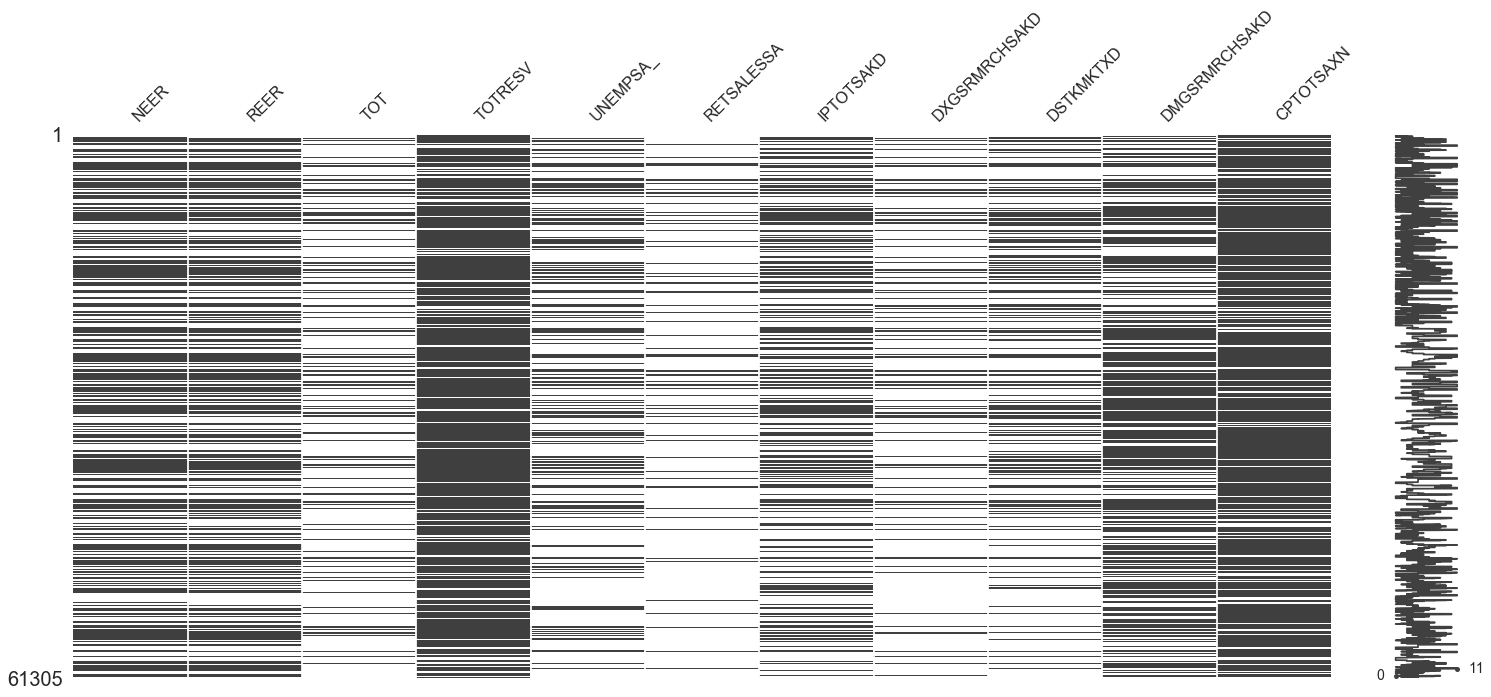

In [356]:
### missing data

import missingno as msno
msno.matrix(worldbank_data)




In [385]:
#Get missing data per country. This is the basic data that will be used, so we will define a arbitrary maximum threshold of missing values.

def count_missing(frame):
    return (frame.shape[0] * frame.shape[1]) - frame.count().sum()

nan_by_country = worldbank_data.groupby(worldbank_data.index.names.difference(["year"])).apply(count_missing)

#Threshold
selected_countries = nan_by_country[nan_by_country < 1500]
selected_countries

country
Argentina             1073
Australia              787
Austria               1058
Belgium                166
Brazil                 349
Bulgaria              1359
Canada                 221
Chile                  671
China                 1005
Colombia              1140
Croatia               1379
Czech Republic         492
Denmark                365
Estonia               1444
Finland                250
France                 228
Germany                154
Greece                 762
Hong Kong China        601
Hungary                515
India                 1326
Indonesia             1052
Ireland                216
Israel                 791
Italy                  470
Japan                   62
Jordan                1282
Korea Rep.             337
Latvia                1238
Luxembourg            1274
Malaysia              1103
Mexico                 232
Netherlands            414
Norway                 459
Pakistan              1302
Peru                   675
Philippines         

In [ ]:
#Subsetting the original data based on the definition above
selected_worldbank_data = worldbank_data[worldbank_data.index.get_level_values(0).isin(selected_countries.index)]


In [434]:
# Example: loading IMF data into pandas
#Monthly data
# Import libraries
import requests
import pandas as pd

# URL for the IMF JSON Restful Web Service, 
# IFS database, and Australian export prices series
#FOr now we are removing Ireland because and aparent error of the api
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/M.AR+AU+AT+BE+BR+BG+CA+CL+CH+CO+HR+CZ+DK+EE+FI+FR+DE+GR+HK+HU+IN+ID+IS+IT+JP+JO+KR+LV+LU+MY+MX+NL+NO+PK+PE+PH+PL+PT+NA+RU+SA+SG+SK+SL+ZA+ES+SE+CH+TW+TH+TN+TR+UG+GB+US+VE.FIGB_PA+LWR_IX+RAFAGOLDV_OZT+RAXG_USD+FASF_XDC+FASMB_XDC+FASL_XDC+FMB_XDC.?startPeriod=1990&endPeriod=2020'

# Get data from the above URL using the requests package
data = requests.get(url).json()



In [437]:
stack = []
for x in range(293):
    data2 = pd.DataFrame(data['CompactData']['DataSet']['Series'][x]["Obs"])[["@OBS_VALUE", "@TIME_PERIOD"]]
    data2["country"] = data['CompactData']['DataSet']['Series'][x]["@REF_AREA"]
    data2["indicator"] = data['CompactData']['DataSet']['Series'][x]["@INDICATOR"]
    stack.append(data2)
stack = pd.concat(stack)

In [438]:
stack
#Next step: transform to Wide format and merge to WB data
#After: Analyze the missing data and data range

,@OBS_VALUE,@TIME_PERIOD,country,indicator
0,11.46,1990-01,VE,RAFAGOLDV_OZT
1,11.46,1990-02,VE,RAFAGOLDV_OZT
2,11.46,1990-03,VE,RAFAGOLDV_OZT
3,11.46,1990-04,VE,RAFAGOLDV_OZT
4,11.46,1990-05,VE,RAFAGOLDV_OZT
5,11.46,1990-06,VE,RAFAGOLDV_OZT
6,11.46,1990-07,VE,RAFAGOLDV_OZT
7,11.46,1990-08,VE,RAFAGOLDV_OZT
8,11.46,1990-09,VE,RAFAGOLDV_OZT
9,11.46,1990-10,VE,RAFAGOLDV_OZT


In [167]:
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

AttributeError: 'list' object has no attribute 'get'

# Quarterly data - Banking crisis

In [60]:
### Creating dictionary of variables 

dictionary = dict([('NYGDPMKTPKDZ','Annual GDP Growth 2010'), 
                   ('CC.EST','Control of Corruption Estimate'),
               ('RL.EST'    ,  'Rule of Law: Estimate'),
               ('RQ.EST'    ,   'Regulatory Quality: Estimate'),
               ('VA.EST'    ,   'Voice and Accountability: Estimate'),
              (' PV.EST'    ,   'Political Stability and Absence of Violence/Terrorism: Estimate'),
                  ('CORENS'       ,'Core CPI,not seas.adj'),
                ('CORESA'        ,'Core CPI,seas.adj'),
                ('CPTOTNSXN'    ,'CPI Price, nominal'),
                ('CPTOTSAXMZGY' ,'CPI Price, % y-o-y, median weighted, seas. adj.'),
                ('CPTOTSAXN'    ,'CPI Price, nominal, seas. adj.'),
                ('CPTOTSAXNZGY' ,'CPI Price, % y-o-y, nominal, seas. adj.'),
                ('DMGSRMRCHNSCD','Imports Merchandise, Customs, current US$, millions'),
                ('DMGSRMRCHNSKD','Imports Merchandise, Customs, constant US$, millions'),
                ('DMGSRMRCHNSXD','Imports Merchandise, Customs, Price, US$'),
                ('DMGSRMRCHSACD','Imports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DMGSRMRCHSAKD','Imports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DMGSRMRCHSAXD','Imports Merchandise, Customs, Price, US$, seas. adj.'),
                ('DPANUSLCU'    ,'Official exchange rate, LCU per USD, period average'),
                ('DPANUSSPB'    ,'Exchange rate, new LCU per USD extended backward, period average'),
                ('DPANUSSPF'    ,'Exchange rate, old LCU per USD extended forward, period average'),
                ('DSTKMKTXD'    ,'Stock Markets, US$'),
                ('DSTKMKTXN'    ,'Stock Markets, LCU'),
                ('DXGSRMRCHNSCD' ,'Exports Merchandise, Customs, current US$, millions'),
                ('DXGSRMRCHNSKD' ,'Exports Merchandise, Customs, constant US$, millions'),
                ('DXGSRMRCHNSXD' ,'Exports Merchandise, Customs, Price, US$'),
                ('DXGSRMRCHSACD' , 'Exports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DXGSRMRCHSAKD' ,'Exports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DXGSRMRCHSAXD' ,'Exports Merchandise, Customs, Price, US$, seas. adj.'),
                ('EMBIG'        ,'J.P. Morgan Emerging Markets Bond Spread (EMBI+'),
                ('EMBIGI'       ,'J.P. Morgan Emerging Markets Bond Index(EMBI+'),
                ('IMPCOV'       ,'Foreign Reserves, Months Import Cover, Goods'),
                ('IPTOTNSKD'    ,'Industrial Production, constant US$'),
                ('IPTOTSAKD'    ,'Industrial Production, constant US$, seas. adj.'),
                ('NEER'         ,'Nominal Effecive Exchange Rate'),
                ('NYGDPMKTPSACD' ,'GDP,current US$,millions,seas. adj.'),
                ('NYGDPMKTPSACN' ,'GDP,current LCU,millions,seas. adj.'),
                ('NYGDPMKTPSAKD' ,'GDP,constant 2010 US$,millions,seas. adj.'),
                ('NYGDPMKTPSAKN' ,'GDP,constant 2010 LCU,millions,seas. adj.'),
                ('REER'          ,'Real Effective Exchange Rate'),
                ('RETSALESSA'    ,'Retail Sales Volume,Index,'),
                ('TOT'           ,'Terms of Trade'),
                ('TOTRESV'       ,'Total Reserves'),
                ('UNEMPSA_'      ,'Unemployment rate,Percent')
                  ])

In [61]:
### Testing Dictionary 

dictionary['TOT']

'Terms of Trade'

## Dependent Variable and Sensitivity Analysis

In this section we are going to create different kinds of target (dependent) variables based on the research papers from the ECB.

i) Nominal Exchange Depreciation > 20%
ii) Sistemic Banking Crises


This tool is inteded to be flexible enough as to allow the inputation of different cenarios. 



In [ ]:
### building dependent variables and sensitivity analysis

# Create a new column called df.target where the value is 1
# if df.debt is greater than 90 and 0 if not
df['target'] = np.where(df['debt']>=50, '1', '0')

# nominal exchange rate depreciation

## monthly time series

### ten or twenty depreciation in a monthly 

# nominal exchange rate


### list of historical crises 


### Stationarity

This section is devoted to buid a tool for assessing stationarity in the dataframe´s time series.

In [17]:
### stationarity and non stationarity discussion 
from statsmodels.tsa.stattools import adfuller
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        return 1
    else:
        return 0

(2.9061435259309514,
 1.0,
 12,
 224,
 {'1%': -3.459884913337196,
  '5%': -2.8745310704320794,
  '10%': -2.573693840082908},
 4051.4409350527517)

In [ ]:
### Running stationarity tests in all collumns in dataframe

from statsmodels.tsa.stattools import adfuller

stack = []
for col in dataoecd.columns:
    test = adfuller(dataoecd[col])
    stack.append(test)


In [ ]:
### testing
stack

In [ ]:
### build indicators


In [85]:
### Preparing machine learning pipeline 

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


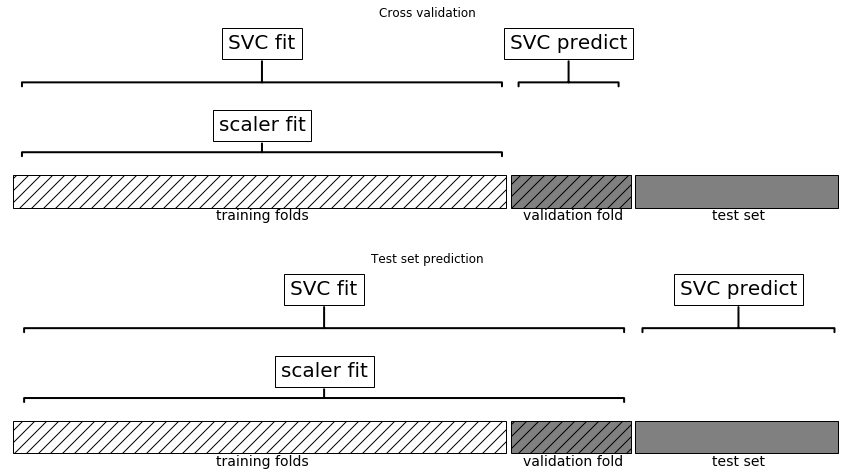

In [89]:
#### Describing what a ML pipeline looks like.

import mglearn 
mglearn.plots.plot_proper_processing()

In [102]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

In [103]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)
svm = SVC()
# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


C:\Users\leomf\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [104]:
from sklearn.model_selection import GridSearchCV
# for illustration purposes only, don't use this code!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


In [105]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [106]:
pipe.fit(X_train, y_train)

C:\Users\leomf\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [107]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [108]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


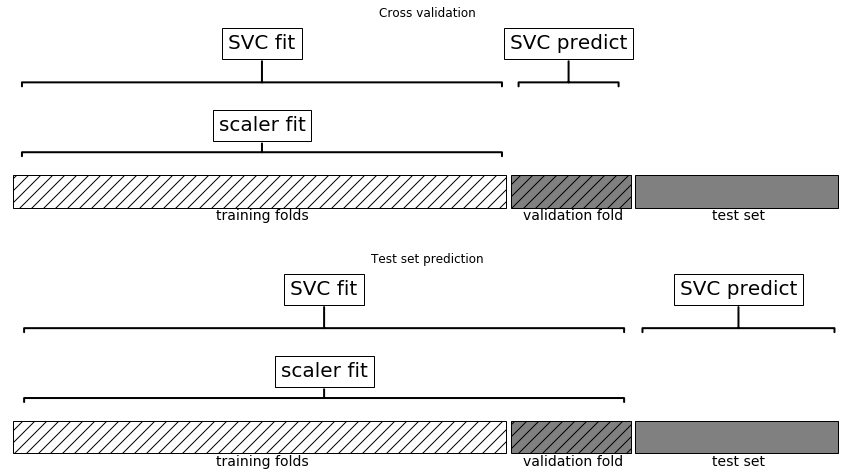

In [109]:
mglearn.plots.plot_proper_processing()